## Install

In [ ]:
!pip install numpy
!pip install gym

!pip install numpy==1.23.5 # 'bool8'


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
bigframes 1.41.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatib

## Import

In [ ]:
import numpy as np
import gym
import random

#Environment


*  5 x 5 grid world
*  Our 🚕 is spawned randomly in a square.
*  The passenger is spawned randomly in one of the 4 possible locations (R, B, G, Y) and wishes to go in one of the 4 possibles locations too.


**[The reward system]**

*  -1 for each timestep
*  +20 for successfully deliver the passenger
*  -10 for illegal actions (pickup or putdown the passenger at the outside of the destination).

In [ ]:
# 환경 생성
env = gym.make("Taxi-v3", render_mode="ansi")
#initialization
obs = env.reset() # obs : 환경에서 에이전트가 관찰한 현재 상태
# 환경 시각화
output = env.render()
print(output)

['+---------+\n|R: | : :\x1b\x1bG\x1b\x1b|\n| : | : : |\n| : : : : |\n| | : | : |\n|Y| : |\x1bB\x1b: |\n+---------+\n\n']


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


**ANSI escape code**

: 코드는 터미널에서 색깔이나 스타일을 표현

일부 IDE에서는 이걸 그대로 텍스트로 출력해서 지저분하게 보임

-> 색코드 제거

In [ ]:
import re

# 출력이 리스트로 되어 있을 경우 문자열로 변환
output_str = ''.join(output)

# ANSI 코드 제거
clean_output = re.sub(r'\x1B(?:[@-Z\\-_]|\[[0-?]*[ -/]*[@-~])', '', output_str)

print(clean_output)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+




## Q-table

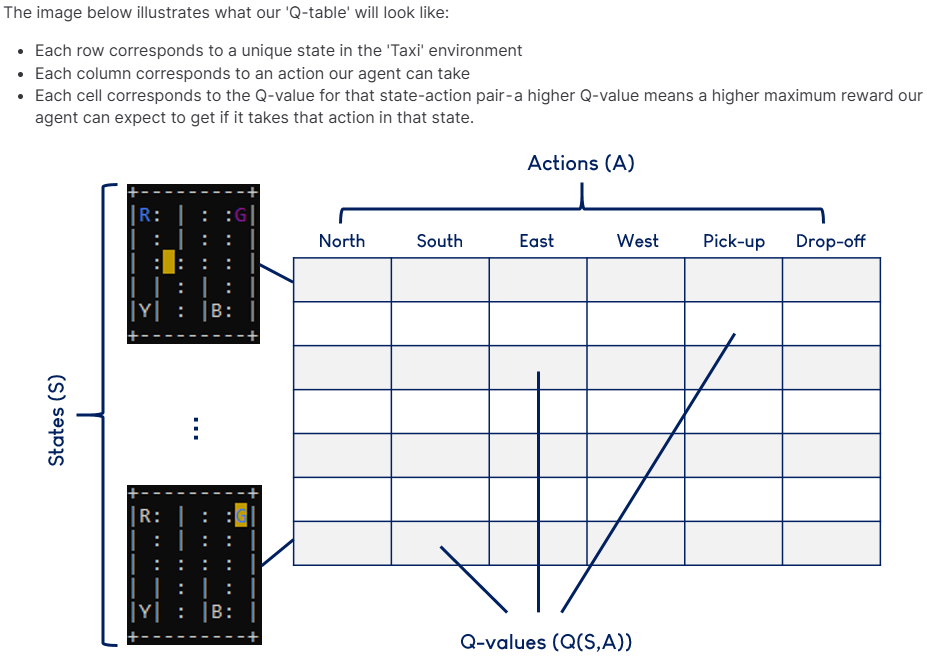

In [ ]:
#state
state_space = env.observation_space.n
print("States: ", state_space )

# state = 목적지 * 택시의 위치 * 승객의 위치
# 500 = 4 * 5 * 5 * 5
# 각 state 마다 action이 6개 있다.

States:  500


In [ ]:
#action
action_space = env.action_space.n
print("Actions: ", action_space )

# N, S, E, W, Pick-up, Drop-off

Actions:  6


In [ ]:
# Q-table
Q = np.zeros((state_space, action_space))
print(Q.shape)

(500, 6)


## Hyperparameter


In [ ]:

learning_rate = 0.01          # Learning rate
gamma = 0.9                  # Discounting rate

# Exploration parameters
epsilon = 0.1               # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001           # Minimum exploration probability
decay_rate = 0.01             # Exponential decay rate for exploration prob

In [ ]:
total_episodes = 5000        # Total number of training episodes
total_test_episodes = 10      # Total number of test episodes
max_steps = 200               # Max steps per episode

## epsilon greedy policy

In [ ]:
def epsilon_greedy_policy(Q, state, epsilon):

  # 1 - ɛ -> exploitation
  if(random.uniform(0,1) > epsilon):
    action = np.argmax(Q[state])

  # ɛ -> exploration
  else:
    action = env.action_space.sample()

  return action

## Q-Learning

In [ ]:
# 고정 epsilon일 때 training

for episode in range(total_episodes):
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):
        #
        action = epsilon_greedy_policy(Q, state, epsilon)

        # 환경에 action 수행
        new_state, reward, done, info = env.step(action)

        # Q-value 업데이트
        Q[state][action] = Q[state][action] + learning_rate * (
            reward + gamma * np.max(Q[new_state]) - Q[state][action]
        )

        if done:
            break

        state = new_state

    print(f"Episode : {episode + 1}, Steps : {step}")
    print("-------------------------")


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Episode : 2501, Steps : 16
-------------------------
Episode : 2502, Steps : 51
-------------------------
Episode : 2503, Steps : 28
-------------------------
Episode : 2504, Steps : 8
-------------------------
Episode : 2505, Steps : 13
-------------------------
Episode : 2506, Steps : 13
-------------------------
Episode : 2507, Steps : 9
-------------------------
Episode : 2508, Steps : 12
-------------------------
Episode : 2509, Steps : 19
-------------------------
Episode : 2510, Steps : 9
-------------------------
Episode : 2511, Steps : 17
-------------------------
Episode : 2512, Steps : 28
-------------------------
Episode : 2513, Steps : 12
-------------------------
Episode : 2514, Steps : 20
-------------------------
Episode : 2515, Steps : 16
-------------------------
Episode : 2516, Steps : 16
-------------------------
Episode : 2517, Steps : 14
-------------------------
Episode : 2518, Steps : 13
-------------------------
Episode : 251

## Test


In [ ]:
import time
rewards = []

frames = []
for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("****************************************************")
    print("EPISODE ", episode)
    for step in range(max_steps):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state][:])
        new_state, reward, done, info = env.step(action)
        total_rewards += reward

        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
        print(f"Step {step} | State: {state} | Action: {action} | Reward: {reward}")

env.close()

print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

****************************************************
EPISODE  0
Step 0 | State: 188 | Action: 2 | Reward: -1
Step 1 | State: 188 | Action: 2 | Reward: -1
Step 2 | State: 188 | Action: 2 | Reward: -1
Step 3 | State: 188 | Action: 2 | Reward: -1
Step 4 | State: 188 | Action: 2 | Reward: -1
Step 5 | State: 188 | Action: 2 | Reward: -1
Step 6 | State: 188 | Action: 2 | Reward: -1
Step 7 | State: 188 | Action: 2 | Reward: -1
Step 8 | State: 188 | Action: 2 | Reward: -1
Step 9 | State: 188 | Action: 2 | Reward: -1
Step 10 | State: 188 | Action: 2 | Reward: -1
Step 11 | State: 188 | Action: 2 | Reward: -1
Step 12 | State: 188 | Action: 2 | Reward: -1
Step 13 | State: 188 | Action: 2 | Reward: -1
Step 14 | State: 188 | Action: 2 | Reward: -1
Step 15 | State: 188 | Action: 2 | Reward: -1
Step 16 | State: 188 | Action: 2 | Reward: -1
Step 17 | State: 188 | Action: 2 | Reward: -1
Step 18 | State: 188 | Action: 2 | Reward: -1
Step 19 | State: 188 | Action: 2 | Reward: -1
Step 20 | State: 188 | Act

## Q-learning -epsilon 감소

In [ ]:
learning_rate = 0.1          # Learning rate
gamma = 0.9                  # Discounting rate

# Exploration parameters
epsilon = 1.0              # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.001           # Minimum exploration probability
decay_rate = 0.05           # Exponential decay rate for exploration prob

In [ ]:
# Reduce epsilon

for episode in range(total_episodes):

    # Reset the environment
    state = env.reset()
    step = 0
    done = False

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)

    for step in range(max_steps):
        #
        action = epsilon_greedy_policy(Q, state, epsilon)

        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, done, info = env.step(action)

        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        Q[state][action] = Q[state][action] + learning_rate * (reward + gamma *
                                    np.max(Q[new_state]) - Q[state][action])
        # If done : finish episode
        if done == True:
            break

        # Our new state is state
        state = new_state

    print(f"Episode : {episode + 1}, Steps : {step}")
    print("-------------------------")

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Episode : 2501, Steps : 15
-------------------------
Episode : 2502, Steps : 6
-------------------------
Episode : 2503, Steps : 15
-------------------------
Episode : 2504, Steps : 14
-------------------------
Episode : 2505, Steps : 12
-------------------------
Episode : 2506, Steps : 13
-------------------------
Episode : 2507, Steps : 15
-------------------------
Episode : 2508, Steps : 11
-------------------------
Episode : 2509, Steps : 10
-------------------------
Episode : 2510, Steps : 12
-------------------------
Episode : 2511, Steps : 13
-------------------------
Episode : 2512, Steps : 16
-------------------------
Episode : 2513, Steps : 17
-------------------------
Episode : 2514, Steps : 11
-------------------------
Episode : 2515, Steps : 10
-------------------------
Episode : 2516, Steps : 13
-------------------------
Episode : 2517, Steps : 15
-------------------------
Episode : 2518, Steps : 12
-------------------------
Episode : 2

## Test


In [ ]:
import time
rewards = []

frames = []
for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0
    print("****************************************************")
    print("EPISODE ", episode)
    for step in range(max_steps):
        env.render()
        # Take the action (index) that have the maximum expected future reward given that state
        action = np.argmax(Q[state][:])
        new_state, reward, done, info = env.step(action)
        total_rewards += reward

        if done:
            rewards.append(total_rewards)
            #print ("Score", total_rewards)
            break
        state = new_state
        print(f"Step {step} | State: {state} | Action: {action} | Reward: {reward}")

env.close()

print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

****************************************************
EPISODE  0
Step 0 | State: 112 | Action: 0 | Reward: -1
Step 1 | State: 212 | Action: 0 | Reward: -1
Step 2 | State: 232 | Action: 2 | Reward: -1
Step 3 | State: 252 | Action: 2 | Reward: -1
Step 4 | State: 272 | Action: 2 | Reward: -1
Step 5 | State: 372 | Action: 0 | Reward: -1
Step 6 | State: 472 | Action: 0 | Reward: -1
Step 7 | State: 476 | Action: 4 | Reward: -1
Step 8 | State: 376 | Action: 1 | Reward: -1
Step 9 | State: 276 | Action: 1 | Reward: -1
Step 10 | State: 256 | Action: 3 | Reward: -1
Step 11 | State: 236 | Action: 3 | Reward: -1
Step 12 | State: 216 | Action: 3 | Reward: -1
Step 13 | State: 116 | Action: 1 | Reward: -1
Step 14 | State: 16 | Action: 1 | Reward: -1
****************************************************
EPISODE  1
Step 0 | State: 368 | Action: 1 | Reward: -1
Step 1 | State: 268 | Action: 1 | Reward: -1
Step 2 | State: 248 | Action: 3 | Reward: -1
Step 3 | State: 228 | Action: 3 | Reward: -1
Step 4 | Stat

파라미터 수정  Score over time: -32.1 -> 8.7


learning_rate : 0.01 -> 0.1          
gamma = 0.9              

epsilon = 1.0            
max_epsilon = 1.0            
min_epsilon = 0.001          
decay_rate = 0.01 -> 0.05        




In [ ]:
Q

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [ -2.55652158,  -2.58824594,  -2.8640519 ,  -2.2533566 ,
          1.62261467, -10.80408724],
       [ -1.69069472,  -1.02546612,  -2.53627185,   0.12440592,
          7.7147    ,  -8.743878  ],
       ...,
       [ -1.20855053,   1.51729098,  -1.36217898,  -1.77712341,
         -9.23917747,  -8.98933478],
       [ -2.80553291,  -2.78166061,  -2.80101893,  -2.09554463,
        -11.21502134, -11.2385412 ],
       [  3.2924233 ,   2.08134726,   3.13656548,  14.03831475,
         -3.2085471 ,  -2.16081581]])